# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

In [1]:
!pip install -Uq scikit-learn

In [2]:
#Импорт библиотек, классов, моделей
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

## Загрузка и подготовка данных

In [3]:
#Загрузка данных
df_0 = pd.read_csv('/datasets/geo_data_0.csv')
df_1 = pd.read_csv('/datasets/geo_data_1.csv')
df_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [4]:
#Функция для просмотра информации о датасетах
def info_about(data):
    display(data.head()) #первые 5 строк
    display(data.info()) #общая информация о столбцах, размерности, типах данных
    display(data.describe()) #основные статистические характеристики
    display(data.duplicated().sum()) #колисчество дубликатов
    display(data.isna().sum()) #количество пропусков
    data.hist(figsize=(12, 12)) #гистограммы

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


0

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

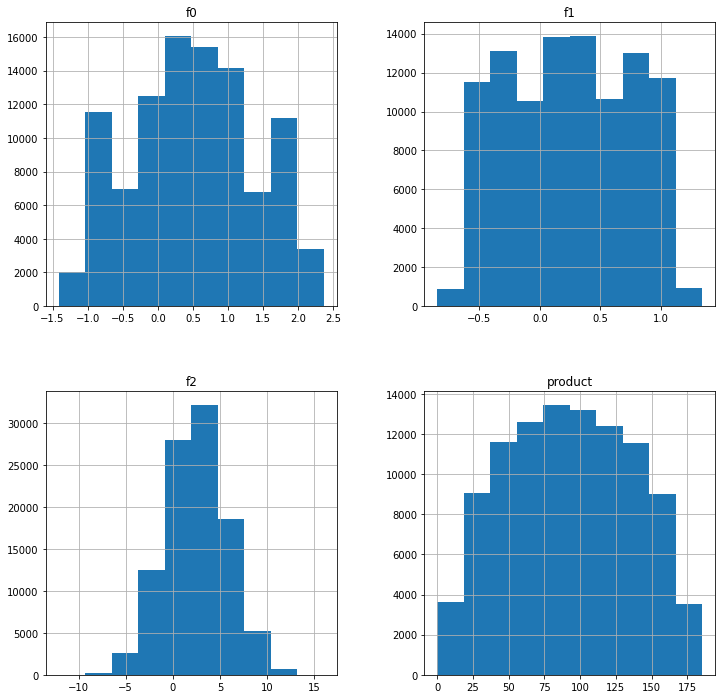

In [5]:
info_about(df_0)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


0

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

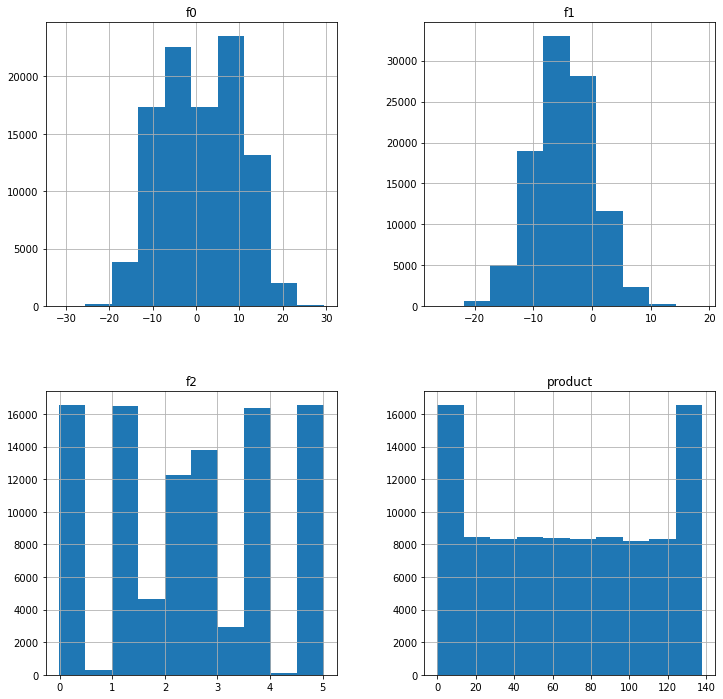

In [6]:
info_about(df_1)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


0

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

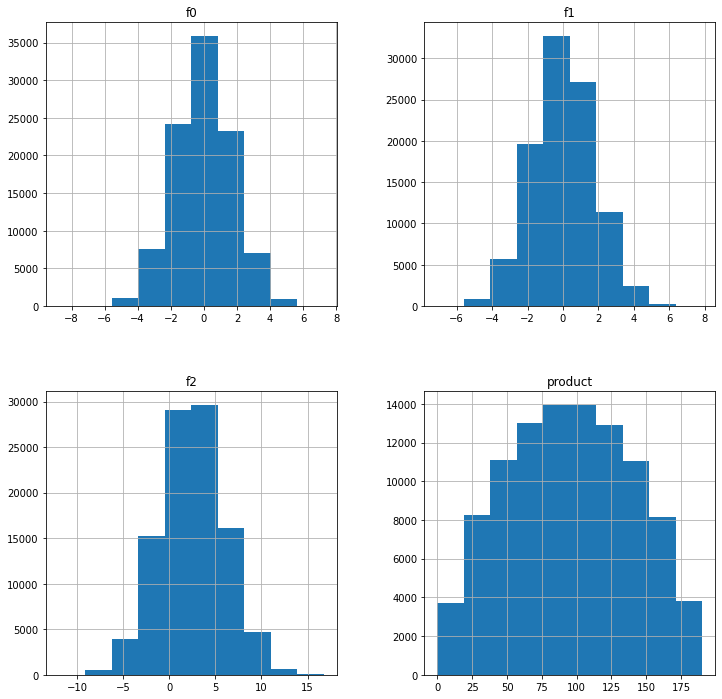

In [7]:
info_about(df_2)

*Так как наш целевой признак **product**, то для подготовки данных для моделей выполним дальнейшие действия:* 

In [8]:
#Разделим признаки и целевой признак в датасетах через функцию
def features_target(data):
    data_target = data['product']
    data_features = data.drop(['id', 'product'], axis=1) #также уберем столбец id, который не несет нам никакой пользы
    return data_target, data_features

In [9]:
df_0_target, df_0_features = features_target(data=df_0)
df_1_target, df_1_features = features_target(data=df_1)
df_2_target, df_2_features = features_target(data=df_2)

#проверим размерность
display(df_0_features.shape,
        df_0_target.shape,
        df_1_features.shape,
        df_1_target.shape,
        df_2_features.shape,
        df_2_target.shape)

(100000, 3)

(100000,)

(100000, 3)

(100000,)

(100000, 3)

(100000,)

**ВЫВОД по "Загрузке и подготовке данных":** 

- типы данных в порядке, явных дубликатов не замечено, пропусков нет, распределения в целом в норме, критических выбросов не наблюдается, следовательно данные оставляем в покое;

- осуществили разделение в датасетах на целевой признак и признаки, убрали столбец *id*.

## Обучение и проверка модели

Необходимо разбить данные на обучающую и валидационную выборки в соотношении 75:25. 

Обучить модель и сделать предсказания на валидационной  выборке. 

Вывести RMSE модели и средний запас предсказанного сырья.

In [10]:
#Функция для обучения модели, расчета метрик
def our_model(features, target):
    features_train, features_valid, target_train, target_valid = train_test_split(features, 
                                                                                  target, 
                                                                                  test_size=0.25, 
                                                                                  random_state=12345)
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    prediction_constant = pd.Series(target_train.mean(), index=target_valid.index)
    rmse = mean_squared_error(target_valid, predictions)**0.5
    mean_product =  predictions.mean()
    return model, target_valid, predictions, rmse, mean_product

**Регион 0**

In [11]:
model_0, df_0_target_valid, prediction_valid_0, rmse_0, mean_product_0  = our_model(features=df_0_features, 
                                                                                                    target=df_0_target)
prediction_valid_0 = pd.Series(prediction_valid_0, index=df_0_target_valid.index)
print(df_0_target_valid.shape)
print(df_0_target_valid.head(10))
print(prediction_valid_0.head(10))
print('rmse модели:', rmse_0)
print('Cредний запас предсказанного сырья:', mean_product_0)

(25000,)
71751     10.038645
80493    114.551489
2655     132.603635
53233    169.072125
91141    122.325180
9539      37.735331
8482     139.227191
30284     72.491987
66393     11.465993
99584    110.562031
Name: product, dtype: float64
71751     95.894952
80493     77.572583
2655      77.892640
53233     90.175134
91141     70.510088
9539      69.127076
8482     125.106759
30284     87.643849
66393     86.035871
99584     98.655311
dtype: float64
rmse модели: 37.5794217150813
Cредний запас предсказанного сырья: 92.59256778438035


**Регион 1**

In [12]:
model_1, df_1_target_valid, prediction_valid_1, rmse_1, mean_product_1  = our_model(features=df_1_features, 
                                                                                                    target=df_1_target)

prediction_valid_1 = pd.Series(prediction_valid_1, index=df_1_target_valid.index)
print(df_1_target_valid.head(10))
print(prediction_valid_1.head(10))
print('rmse модели:', rmse_1)
print('Cредний запас предсказанного сырья:', mean_product_1)

71751     80.859783
80493     53.906522
2655      30.132364
53233     53.906522
91141      0.000000
9539     110.992147
8482     137.945408
30284     84.038886
66393    110.992147
99584     26.953261
Name: product, dtype: float64
71751     82.663314
80493     54.431786
2655      29.748760
53233     53.552133
91141      1.243856
9539     111.438490
8482     137.134374
30284     82.888902
66393    110.897311
99584     29.219306
dtype: float64
rmse модели: 0.893099286775617
Cредний запас предсказанного сырья: 68.728546895446


**Регион 2**

In [13]:
model_2, df_2_target_valid, prediction_valid_2, rmse_2, mean_product_2  = our_model(features=df_2_features, 
                                                                                                    target=df_2_target)
prediction_valid_2 = pd.Series(prediction_valid_2, index=df_2_target_valid.index)
print(df_2_target_valid.shape)
print(df_2_target_valid.head(10))
print(prediction_valid_2.head(10))
print('rmse модели:', rmse_2)
print('Cредний запас предсказанного сырья:', mean_product_2)

(25000,)
71751     61.212375
80493     41.850118
2655      57.776581
53233    100.053761
91141    109.897122
9539     105.904629
8482      51.646180
30284    173.162121
66393    113.143072
99584     56.803215
Name: product, dtype: float64
71751     93.599633
80493     75.105159
2655      90.066809
53233    105.162375
91141    115.303310
9539     121.939197
8482     119.053040
30284     75.396575
66393    111.400543
99584     84.029320
dtype: float64
rmse модели: 40.02970873393434
Cредний запас предсказанного сырья: 94.96504596800489


**ВЫВОД по "Обучению и проверке модели":**

- по точности предсказания моделей лидирует модель региона 1. В остальных регионах ошибка больше в разы;

- по среднему запасу сырья регион 1 замыкает тройку со значением 68.72, в лидерах регион 2 - 94.96, регион 0 - 92.59.

## Подготовка к расчёту прибыли

Ключевые значения расчетов сохраните в отдельных переменных.

Рассчитать достаточный объем сырья для безубыточной разработки новой скважины.

Сравнить полученный объем сырья со средним запасом в каждом регионе.

In [14]:
BUDGET = 10000000000 # бюджет на регион
N = 500 # число скважин для исследования
COUNT = 200 # число скважин для разработки
COST_BAR = 450000 # стоимость 1000 баррелей

In [15]:
budget_count = BUDGET/COUNT # бюджет на 1 скважину
product = budget_count/COST_BAR # кол-во тыс барреллей
print('Достаточный объем сырья для безубыточной разработки новой скважины:', product)

Достаточный объем сырья для безубыточной разработки новой скважины: 111.11111111111111


In [16]:
print('Cредний запас сырья в регионе 0:', df_0['product'].mean())
print('Cредний запас сырья в регионе 1:', df_1['product'].mean())
print('Cредний запас сырья в регионе 2:', df_2['product'].mean())

print('Достаточный объем сырья для безубыточной разработки новой скважины:', product)

Cредний запас сырья в регионе 0: 92.50000000000001
Cредний запас сырья в регионе 1: 68.82500000000002
Cредний запас сырья в регионе 2: 95.00000000000004
Достаточный объем сырья для безубыточной разработки новой скважины: 111.11111111111111


**ВЫВОД по "Подготовке к расчету прибыли":**

- достаточный объем сырья для безубыточной разработки новой скважины равен 111 тыс;

- по сравнению с запасами в других регионах это значение выше имеющихся запасов.

## Расчёт прибыли и рисков 

Написать функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели.

Посчитайте риски и прибыль для каждого региона.

In [17]:
#Функция для расчета прибыли по скважинам и предсказаниям моделей
def profit(target, probabilities, count):
    probabilities_sorted = probabilities.sort_values(ascending=False)
    selected = target[probabilities_sorted.index][:count]
    return (COST_BAR*selected.sum() - BUDGET)/1000000

In [18]:
#Функция нахождения прибыли техникой Bootstrap
def bootstrap1000(target, prediction, n):
    state = np.random.RandomState(12345)
    values = []
    for i in range (1000):
        sub_target = target.sample(n, replace=True, random_state=state)
        sub_prediction = prediction[sub_target.index]
        values.append(profit(sub_target, sub_prediction, COUNT))
    values = pd.Series(values)
    value_mean = values.mean() # среднее значение прибыли
    lower = values.quantile(q=0.025) # 2,5% квартиль для подсчета нижней границы 95% доверительного интервала 
    upper = values.quantile(q=0.975) # 97,5% квартиль для подсчета верхней границы 95% доверительного интервала
    risk = (len(values.loc[values < 0])/len(values))*100
    return value_mean, lower, upper, risk    

**Регион 0**

In [19]:
profit_0, lower_0, upper_0, risk_0 = bootstrap1000(df_0_target_valid, prediction_valid_0, N)
print('Средняя прибыль в регионе 0:', profit_0)
print('95% доверительный интервал для средней прибыли в регионе 0:', lower_0, '-', upper_0)
print('Риск убытков в регионе 0:', risk_0, '%')

Средняя прибыль в регионе 0: 425.9385269105924
95% доверительный интервал для средней прибыли в регионе 0: -102.09009483793655 - 947.9763533583689
Риск убытков в регионе 0: 6.0 %


**Регион 1**

In [20]:
profit_1, lower_1, upper_1, risk_1 = bootstrap1000(df_1_target_valid, prediction_valid_1, N)
print('Средняя прибыль в регионе 1:', profit_1)
print('95% доверительный интервал для средней прибыли в регионе 1:', lower_1, '-', upper_1)
print('Риск убытков в регионе 1:', risk_1, '%')

Средняя прибыль в регионе 1: 515.22277344329
95% доверительный интервал для средней прибыли в регионе 1: 68.87322537050176 - 931.5475912570495
Риск убытков в регионе 1: 1.0 %


**Регион 2**

In [21]:
profit_2, lower_2, upper_2, risk_2 = bootstrap1000(df_2_target_valid, prediction_valid_2, N)
print('Средняя прибыль в регионе 2:', profit_2)
print('95% доверительный интервал для средней прибыли в регионе 2:', lower_2, '-', upper_2)
print('Риск убытков в регионе 2:', risk_2, '%')

Средняя прибыль в регионе 2: 435.0083627827556
95% доверительный интервал для средней прибыли в регионе 2: -128.880547329789 - 969.7069541802662
Риск убытков в регионе 2: 6.4 %


**ВЫВОД по "Расчету прибыли и рисков":** самым предпочтительным регионом для разработки является *Регион 1*, так как по сравнению с другими здесь:

- наибольшая возможная средняя прибыль - 515.222;

- самый низкий риск убытков - 1%

- самый лучший 95% доверительный интервал.

## Выводы

### Целями нашего проекта были:

- построить модель для определения региона, где добыча принесет наибольшую прибыль

- проанализировать возможную прибыль и риски техникой Bootstrap

### Нам были предоставлены следующие датасеты:

geo_data_0.csv, geo_data_1.csv, geo_data_2.csv, где 

- *id* — уникальный идентификатор скважины;

- *f0, f1, f2* — три признака точек (неважно, что они означают, но сами признаки значимы);

- *product* — объём запасов в скважине (тыс. баррелей).

### Блок "Загрузка и подготовка данных": 

- типы данных в порядке, явных дубликатов не замечено, пропусков нет, распределения в целом в норме, критических выбросов не наблюдается, следовательно данные оставляем в покое;

- осуществили разделение в датасетах на целевой признак и признаки, убрали столбец *id*.

### Блок "Обучение и проверка модели":

- по точности предсказания моделей лидирует модель региона 1. В остальных регионах ошибка больше в разы;

- по среднему запасу сырья регион 1 замыкает тройку со значением 68.72, в лидерах регион 2 - 94.96, регион 0 - 92.59.

### Блок "Подготовка к расчету прибыли":

- достаточный объем сырья для безубыточной разработки новой скважины равен 111 тыс;

- по сравнению с запасами в других регионах это значение выше имеющихся запасов.

### Блок "Расчет прибыли и рисков":

самым предпочтительным регионом для разработки является *Регион 1*, так как по сравнению с другими здесь:

- наибольшая возможная средняя прибыль - 515.222;

- самый низкий риск убытков - 1%

- самый лучший 95% доверительный интервал.
------------------------------------------------------------------------------------------------------------------------------

**Рекоменация к разработке: РЕГИОН 1**

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован